# <font color=red>Problem Statement</font>
## You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## <font color=green>Dataset Overview</font>

### The dataset consists of the following columns:

1. <font type=bold>Alcohol:</font> Alcohol content in the wine sample.
2. Malic_Acid: Amount of malic acid in the wine.
3. Ash: Ash content in the wine.
4. Ash_Alcalinity: Alkalinity of ash in the wine.
5. Magnesium: Magnesium content in the wine.
6. Total_Phenols: Total phenols content in the wine.
7. Flavanoids: Flavonoid content in the wine.
8. Nonflavanoid_Phenols: Non-flavonoid phenol content in the wine.
9. Proanthocyanins: Proanthocyanin content in the wine.
10. Color_Intensity: Intensity of the color of the wine.
11. Hue: Hue of the wine.
12. OD280: Ratio of OD280/OD315 of diluted wines.
13. Proline: Proline content in the wine.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
df = pd.read_csv('WineData.csv')
df.head(5)

Unnamed: 0  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0           0    14.23        1.71  2.43          15.6        127   
1           1    13.20        1.78  2.14          11.2        100   
2           2    13.16        2.36  2.67          18.6        101   
3           3    14.37        1.95  2.50          16.8        113   
4           4    13.24        2.59  2.87          21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [2]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

# Task 1: Data Preprocessing

<li> Handle any missing values if present.</li>
<li>Scale the data using StandardScaler or MinMaxScaler since K-means is sensitive to the scale of features.</li>
<li>Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).</li>

In [3]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df1  = df.copy()
df1.head(2)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df1[df1.columns] = scaler.fit_transform(df1)
df1.head(3)

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1  0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2  0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.573840              0.283019         0.593060         0.372014   
1    0.510549              0.245283         0.274448         0.264505   
2    0.611814              0.320755         0.757098         0.375427   

        Hue     OD280   Proline  
0  0.455285  0.970696  0.561341  
1  0.463415  0.780220  0.550642  
2  0.447154  0.695971  0.646933

# Task 2: Determine the Optimal Number of Clusters
<li>Use the Elbow method to determine the optimal number of clusters.</li>
<li>Visualize the results using a line plot of the Within-Cluster Sum of Squares (WCSS) against the number of clusters.</li>

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
WCSS = []
for i in range(1, 13):  
    Km = KMeans(n_clusters=i)
    Km.fit(df1)
    WCSS.append(Km.inertia_) 

In [17]:
WCSS

[95.59953778471062,
 64.5376670238943,
 48.97248096345845,
 45.90652827052029,
 42.95980798132031,
 40.99641053127266,
 39.19386000252671,
 36.40402855710148,
 34.62901898769006,
 33.661087707426034,
 31.985567476374733,
 31.81300305716575]

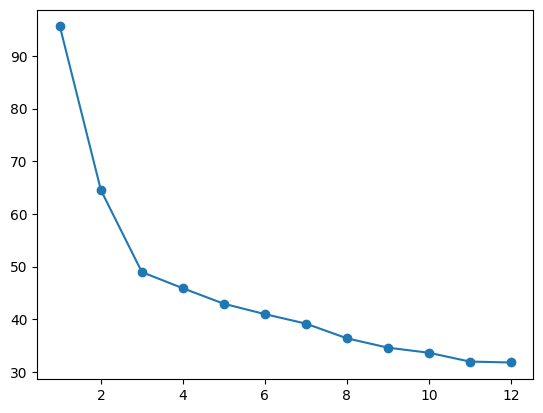

In [20]:
plt.plot(range(1,13),WCSS, marker='o')

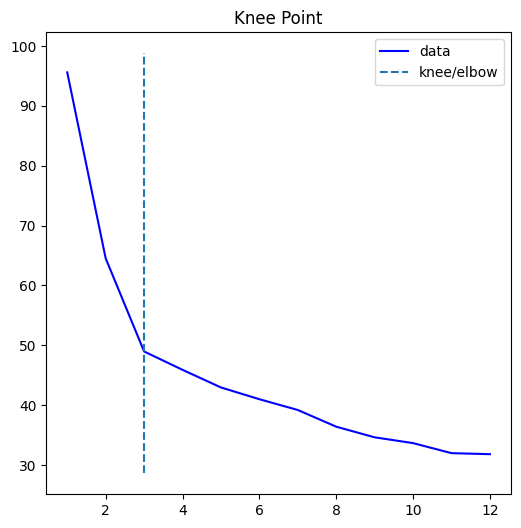

In [23]:
from kneed import KneeLocator as kn
clusetr = range(1,13)
kl = kn(clusetr, WCSS, direction = 'decreasing', curve='convex')
kl.plot_knee()

# Task 3: K-means Clustering
<li>Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.</li>
<li>Assign cluster labels to each data point and create a new column in the dataset with these labels.</li>

In [24]:
kmc = KMeans(n_clusters=3)
kmc.fit(df1)
df['cluster'] = kmc.predict(df1)
df.head(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3.17     1185        2  
3   3.45     1480        2  
4   2.93      735        2

In [25]:
df.cluster.nunique()

3

In [26]:
df['cluster'].value_counts()

cluster
0    63
2    60
1    55
Name: count, dtype: int64

In [28]:
km.cluster_centers_

array([[0.39425837, 0.56863097, 0.63101604, 0.5787254 , 0.35770751,
        0.60877743, 0.5308784 , 0.43396226, 0.56524233, 0.18561899,
        0.40133038, 0.6993007 , 0.19310077],
       [0.55180055, 0.62138548, 0.56065297, 0.53201302, 0.25686499,
        0.20907441, 0.06462358, 0.69016882, 0.16088328, 0.33864739,
        0.22550278, 0.22537112, 0.22618064],
       [0.79157895, 0.19525692, 0.52905526, 0.24570447, 0.36449275,
        0.75724138, 0.65893108, 0.25157233, 0.55793901, 0.47497156,
        0.47425474, 0.66617827, 0.72358535],
       [0.43070175, 0.1301054 , 0.45008913, 0.36254296, 0.3134058 ,
        0.33448276, 0.12587904, 0.84591195, 0.13564669, 0.35068259,
        0.32926829, 0.13492063, 0.26117451],
       [0.71342105, 0.2763834 , 0.5959893 , 0.41546392, 0.51521739,
        0.67258621, 0.56107595, 0.30566038, 0.53138801, 0.34624573,
        0.46910569, 0.71080586, 0.52557061],
       [0.37923977, 0.11682038, 0.23469994, 0.27949599, 0.352657  ,
        0.33716475, 0.28270

# Task 4: Cluster Analysis
<li>Analyze the clusters by comparing the mean values of each feature within each cluster.</li>
<li>Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.</li>

In [29]:
cl_analysis  = df.groupby('cluster').mean()
cl_analysis

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
cluster                                                              
0        12.229524    1.971111  2.245079     20.253968   92.952381   
1        13.099818    3.160909  2.407455     21.043636   98.654545   
2        13.719333    1.964000  2.456500     17.278333  107.866667   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
cluster                                                                     
0             2.299365    2.160159              0.347778         1.669683   
1             1.689818    0.847818              0.457818         1.133636   
2             2.845500    2.974833              0.288667         1.927333   

         Color_Intensity       Hue     OD280      Proline  
cluster                                                    
0               3.032857  1.058571  2.879841   500.174603  
1               6.936545  0.716836  1.709273   624.854545  
2               5.462667  1.071833  3.157333  1117.816667

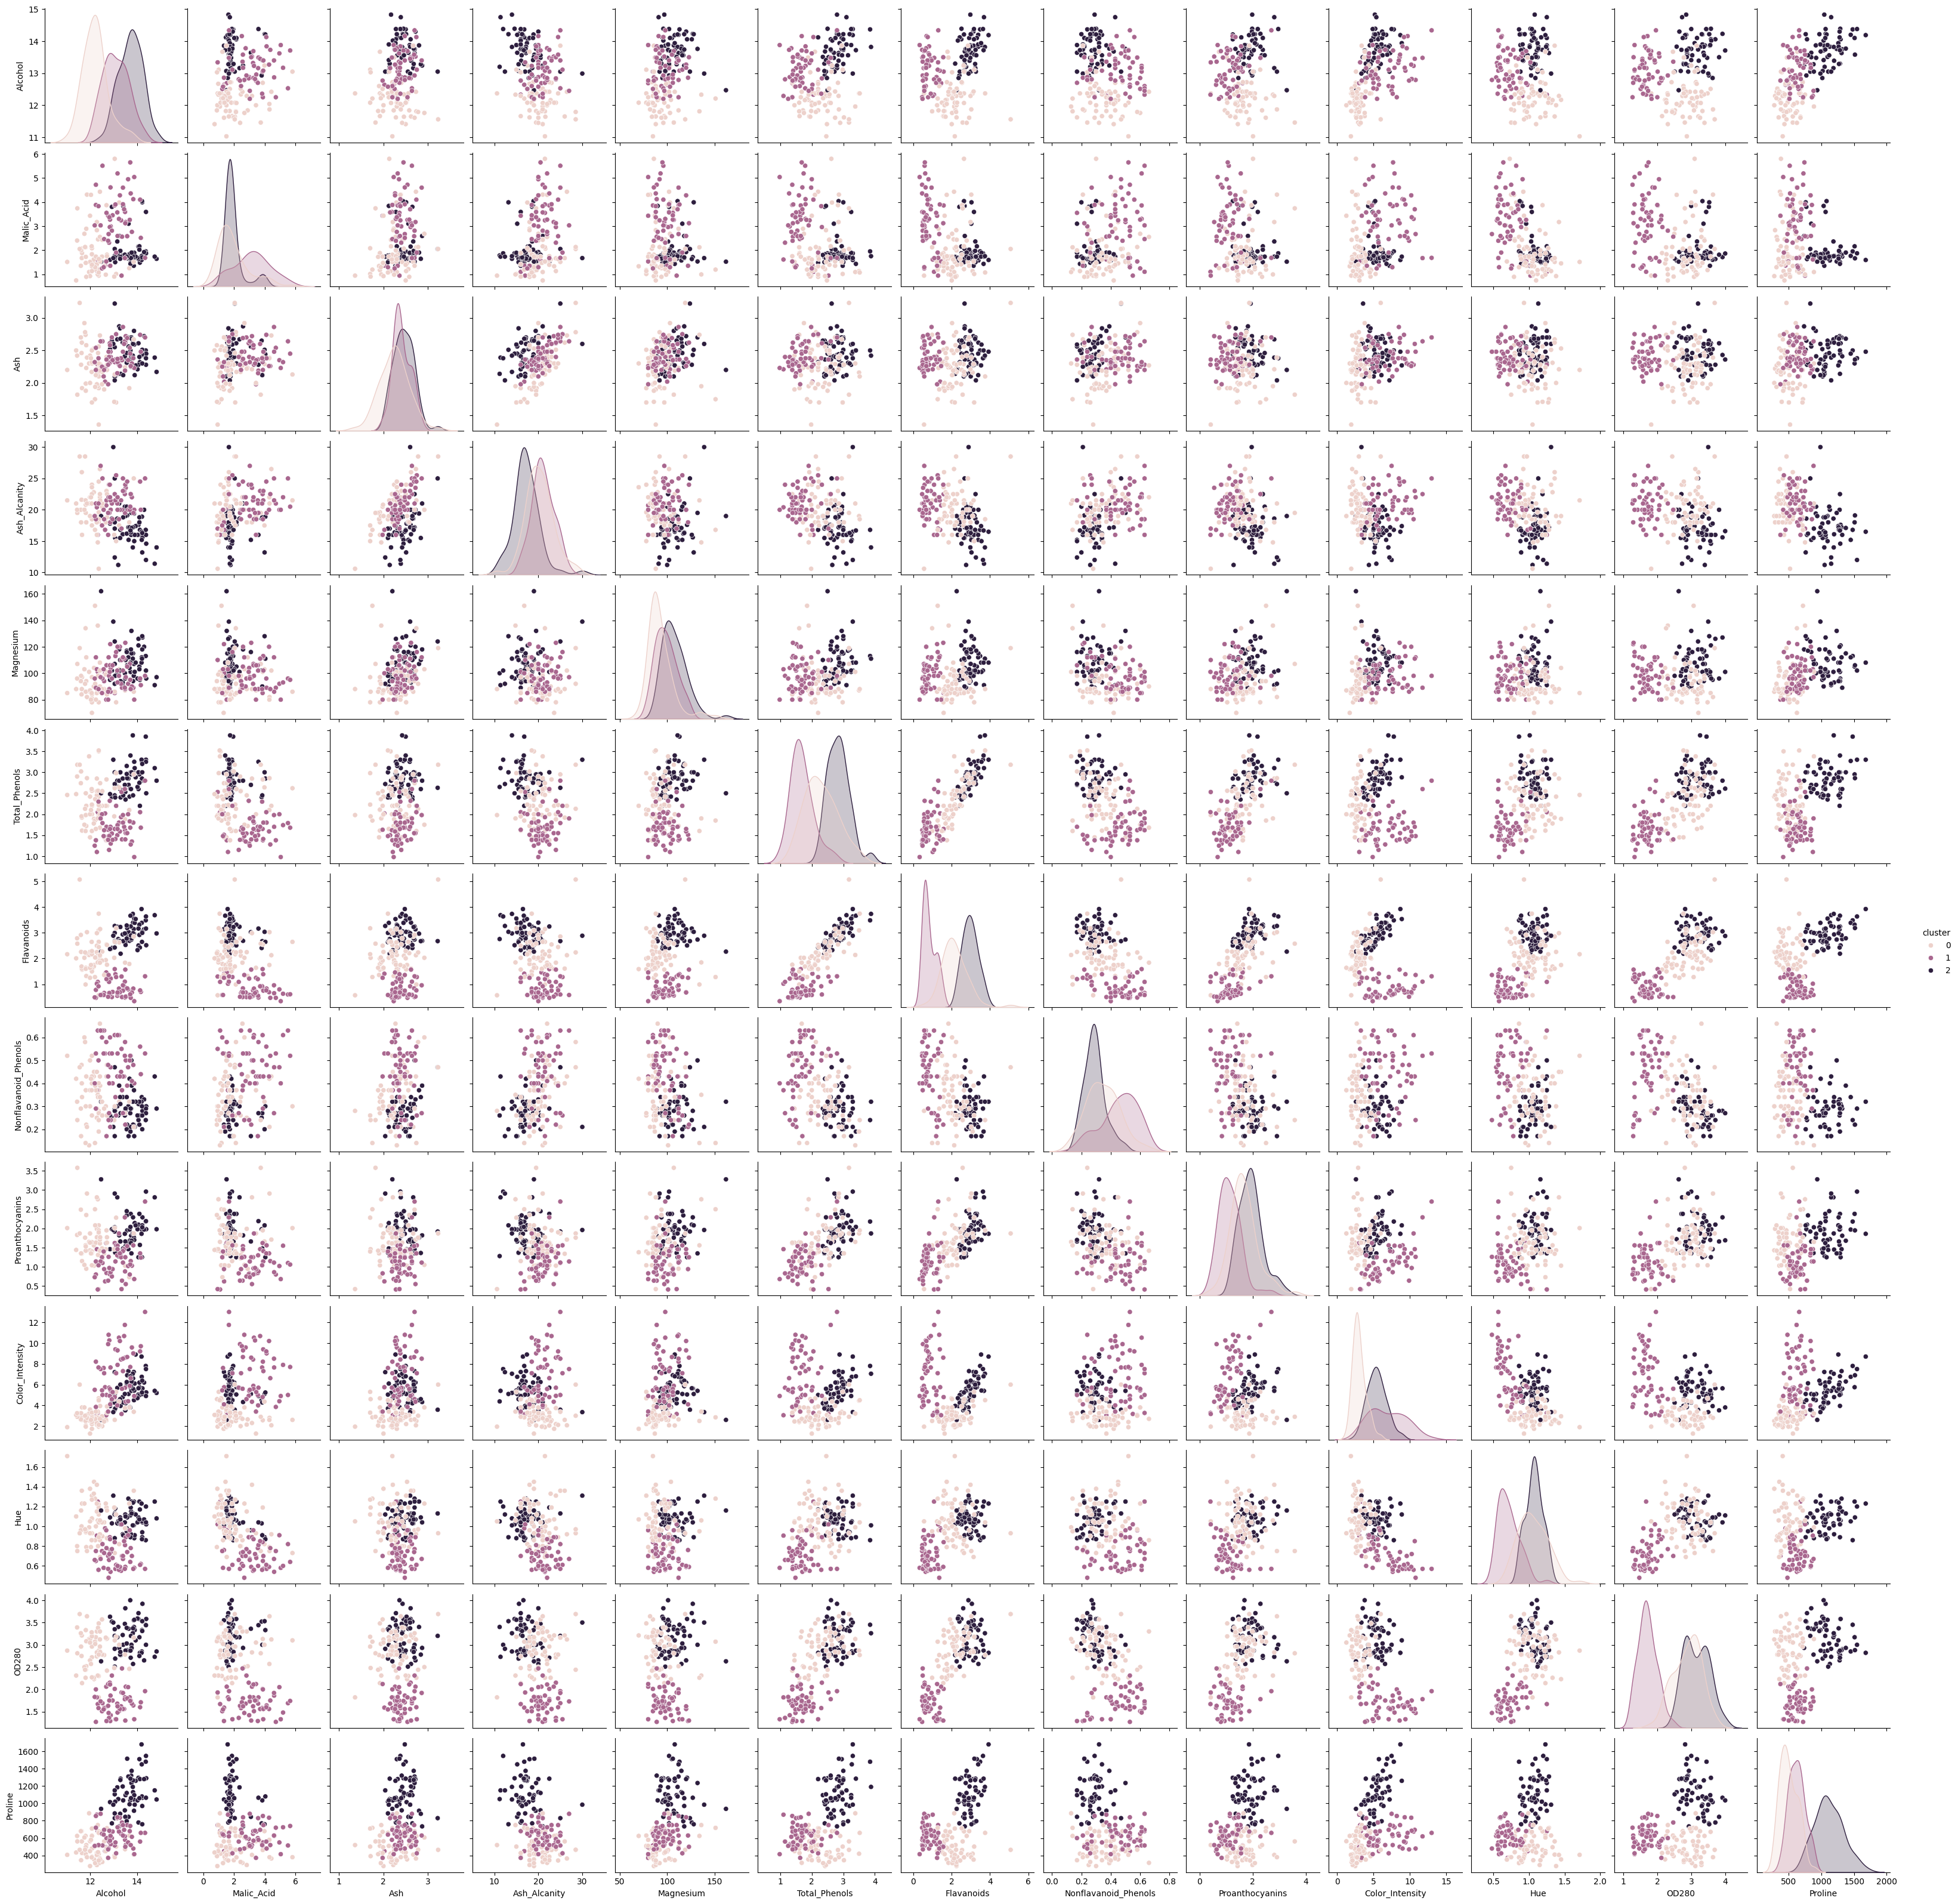

In [30]:
import seaborn as sns
sns.pairplot(data=df,hue='cluster')

In [31]:
cen = kmc.cluster_centers_
cen

array([[0.31566416, 0.24330259, 0.47330447, 0.49762723, 0.2494824 ,
        0.45495348, 0.38399973, 0.41090147, 0.3973762 , 0.14956119,
        0.47038328, 0.58968545, 0.15846976],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.7077193 , 0.24189723, 0.58636364, 0.34424399, 0.4115942 ,
        0.64327586, 0.55587201, 0.29937107, 0.47865405, 0.35688282,
        0.48116531, 0.69133089, 0.59901331]])

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]

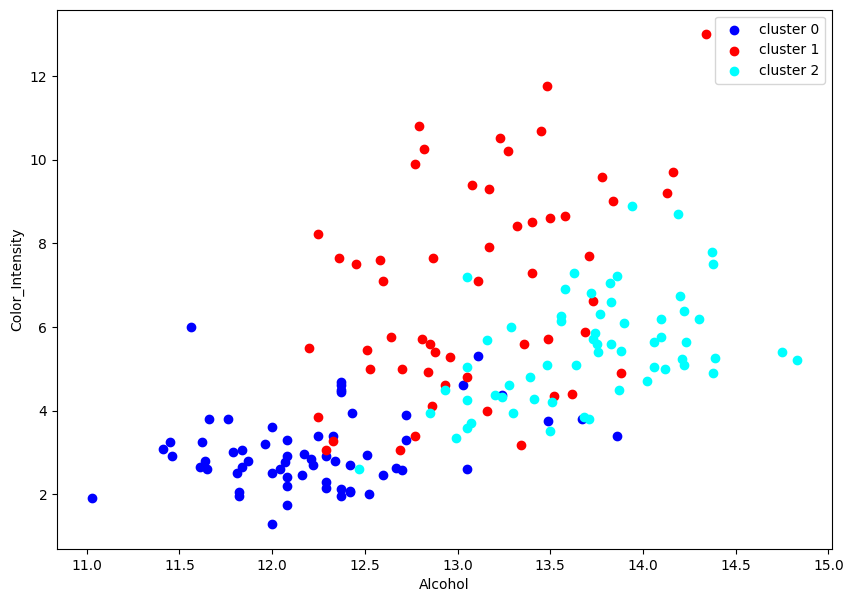

In [35]:
plt.figure(figsize=(10,7))

plt.scatter(df1.Alcohol, df1.Color_Intensity, color='blue', label='cluster 0')
plt.scatter(df2.Alcohol, df2.Color_Intensity, color='red', label='cluster 1')
plt.scatter(df3.Alcohol, df3.Color_Intensity, color='cyan', label='cluster 2')

plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')

plt.legend()

<Axes: xlabel='Alcohol', ylabel='Color_Intensity'>

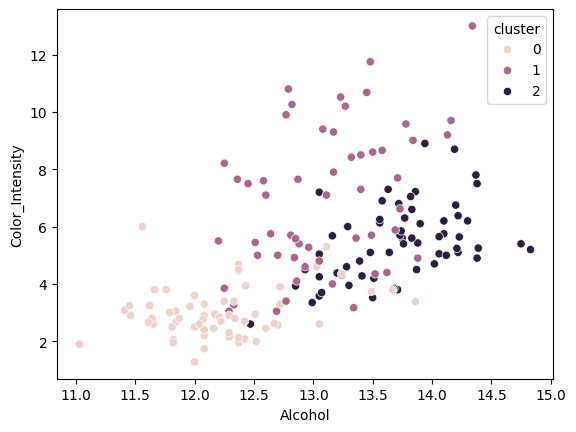

In [36]:
sns.scatterplot(data=df, x='Alcohol', y='Color_Intensity', hue='cluster')

# Task 5: Interpretation
<li>Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, 
or which has the most intense color, etc.</li>
<li>Suggest potential names or categories for each cluster based on the observed characteristics.</li>